# Risk Factors for Heart Failure
This is notebook performs a blind analysis to find the most predictive factors of a heart failure by employing exploratory data analysis and supervised learning.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart failure?

## 2. Data
The dataset for this analysis is obtained from Kaggle: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

## 3. Evaluation
> Because heart failure is very dangerous, if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

## Preparing the Tools
We are going to use pandas for loading and exploring the data, matplotlib and seaborn for visualization, and sklearn to build and train machine learning models

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# supress Future warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [3]:
data = pd.read_csv("heart.csv")
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
data.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [4]:
# check data dimensions
data.shape

(918, 12)

## Data Exploration (exploratory data analysis or EDA)
We will try to learn more about our data by answering these questions.
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. Is Is any feature correlated with the target?
6. Are there any patterns in the data?
7. How can you add, change or remove features to get more out of your data?

In [5]:
# Let's find out how many of each class there
data["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

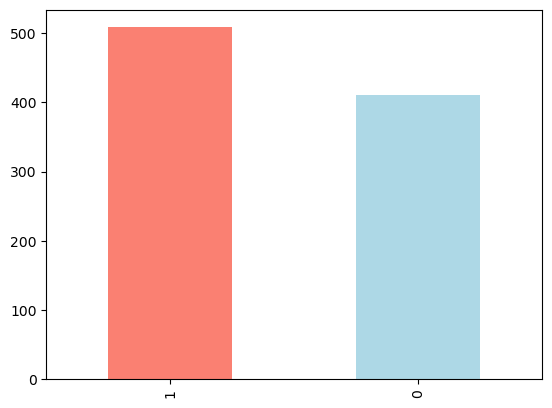

In [6]:
data["HeartDisease"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

**Observation:**   
The data seems to be fairly balanced between the two classes; heart failure (1) and no heart failure (0)

In [7]:
# check the data types of each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Observation:**   
* The data contains a mixture of numerical (int) and categorical (object) datatypes.
* Also, it can be seen that the dataset does not contain any missing values.
* We will have to encode the categorical variables

But let's confirm it in another way:

In [8]:
# Are there any missing values?
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# get a statistical summary of our data
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

**Observation:**   
* It can be seen that the study was conducted over people between the age of 28 and 77. 
* It will be interesting to check how age, gender, and other features affects the probability of have a heart failure


## Encode Categorical Varibales

In [8]:
# before encoding we will save the original dataframe for later use of catgorical labels
data_raw = data.copy()

In [9]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [10]:
# categorical columns
catCols = data.select_dtypes("object").columns
catCols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [11]:
### convert all columns that contain categorical variables to the pandas categorical 
### object which is recognisable in sklearn

for column in catCols:
    data[column] = data[column].astype("category").cat.codes
    
data.dtypes

Age                 int64
Sex                  int8
ChestPainType        int8
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG           int8
MaxHR               int64
ExerciseAngina       int8
Oldpeak           float64
ST_Slope             int8
HeartDisease        int64
dtype: object

In [12]:
data.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

## Analysizng Categorical Features

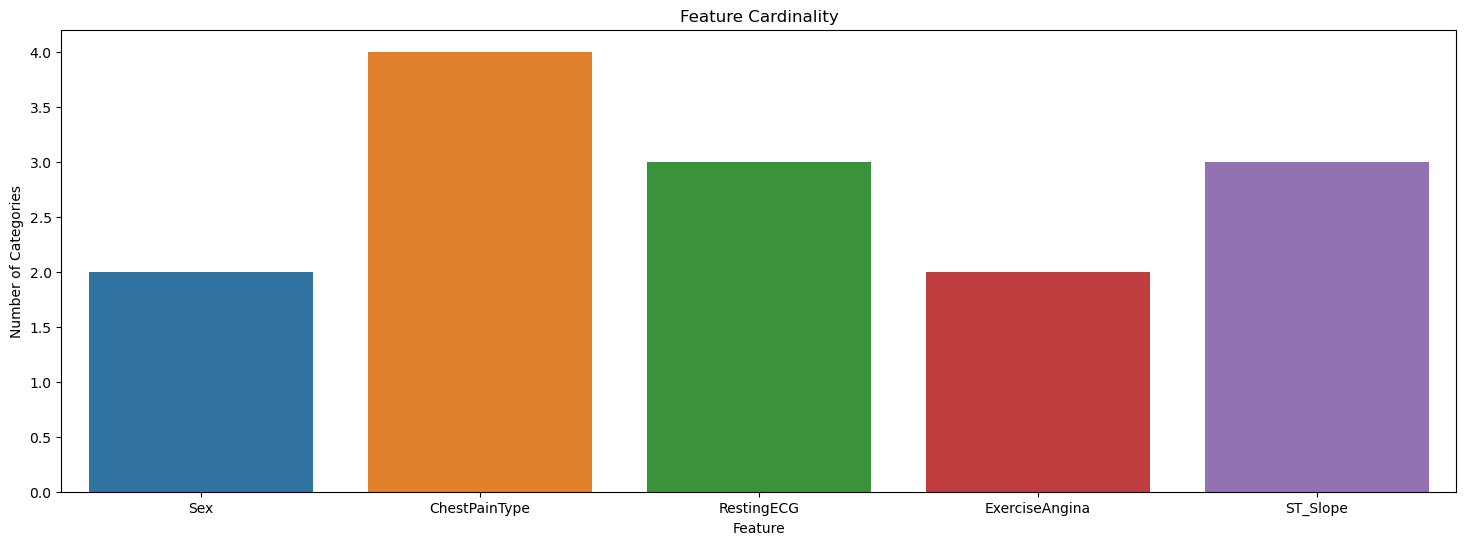

In [13]:
# Look at cadinality of the categorical columns
cards = [len(data[col].unique()) for col in catCols]

fig,ax = plt.subplots(figsize=(18,6))
sns.barplot(x=catCols, y=cards)
ax.set_xlabel('Feature')
ax.set_ylabel('Number of Categories')
ax.set_title('Feature Cardinality');

In [14]:
data_raw.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [15]:
# Compare target column with sex column
pd.crosstab(data_raw.HeartDisease, data_raw.Sex)

Sex             F    M
HeartDisease          
0             143  267
1              50  458

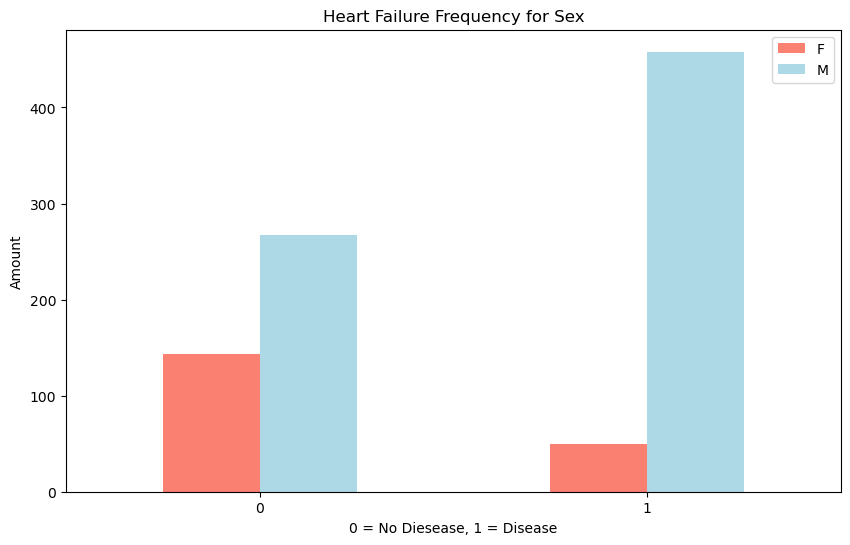

In [16]:
# Sex
# Create a plot of crosstab
pd.crosstab(data_raw.HeartDisease, data_raw.Sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Failure Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend();
plt.xticks(rotation=0);

**Observation**  
* From above, we can assume that heart failure occurs more in males.
* This can be seen from the fact that the ratio of sick males to healthy males is about 2:1 whereas in females the ratio is about 1:3


In [18]:
# ChestPainType
data_raw.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [19]:
# Compare target column with sex column
pd.crosstab(data_raw.HeartDisease, data_raw.ChestPainType)

ChestPainType  ASY  ATA  NAP  TA
HeartDisease                    
0              104  149  131  26
1              392   24   72  20

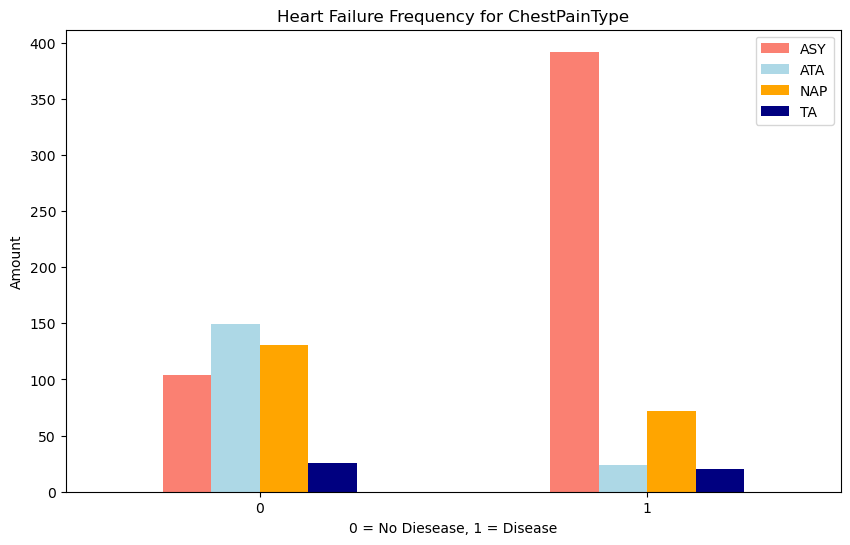

In [20]:
# ChestPainType
# Create a plot of crosstab
pd.crosstab(data_raw.HeartDisease, data_raw.ChestPainType).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue", "orange", "navy"])

plt.title("Heart Failure Frequency for ChestPainType")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend();
plt.xticks(rotation=0);

 [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
 
**Observation**   
* We can clearly see that Typical Angina (TA) is very frequent in heart failure cases. This may be an alarm for heart failure as it is highly frequent compared to other types of chest pains.
* The other types of chect pain on the other hand are slightly more frequent in non heart failure cases. This may be an indication that such chest pains don't share a causal effect with heart failure.

## Analyzing Numeric Variables

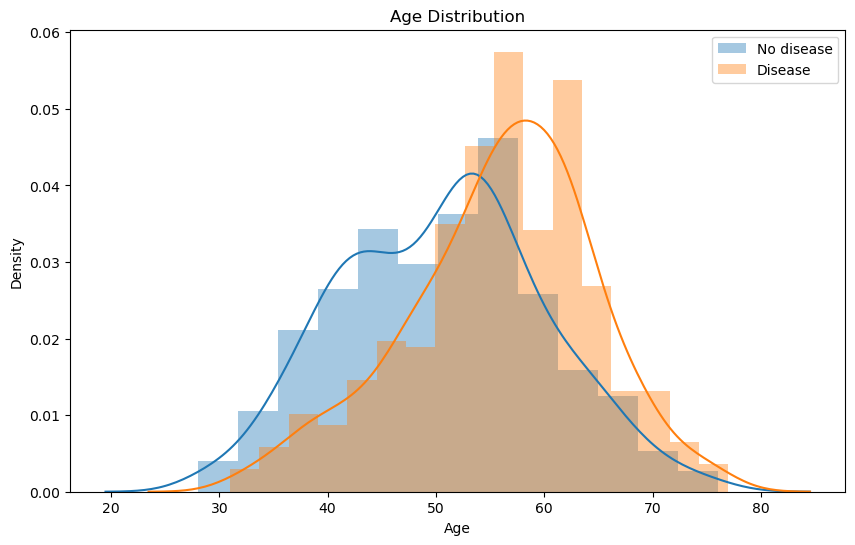

In [25]:
# Age
# Distribution of Age by disease status
fig,ax = plt.subplots(figsize=(10,6))
data_disease = data[data['HeartDisease']==1]
data_no_disease = data[data['HeartDisease']==0]

sns.distplot(data_no_disease['Age'], label='No disease')
sns.distplot(data_disease['Age'], label='Disease')
ax.legend()
ax.set_title('Age Distribution');

**Observation**   
* People within the age group less than 55 years are more likely to be healthy
* People older than 55 years are more likely to have a heart failure
* This means people older than 55 years should watch out. 

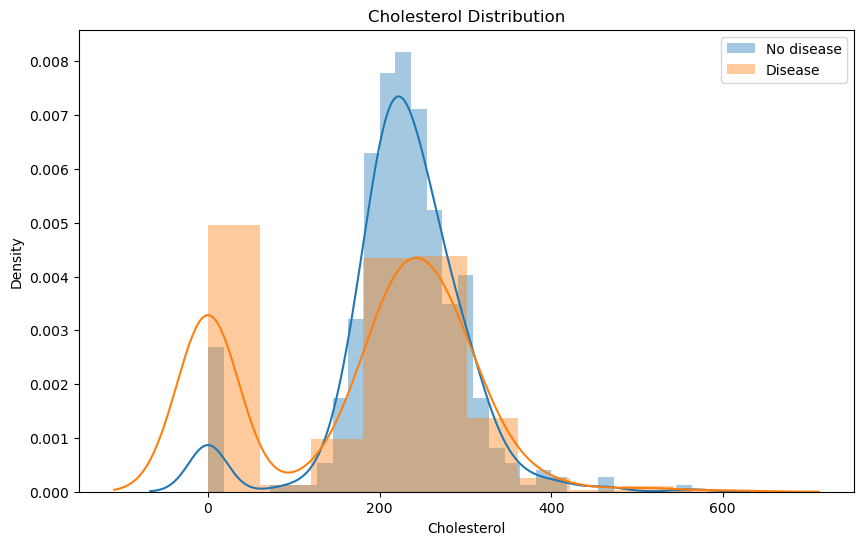

In [26]:
# Cholesterol
# Distribution of cholesterol by disease status
fig,ax = plt.subplots(figsize=(10,6))
data_disease = data[data['HeartDisease']==1]
data_no_disease = data[data['HeartDisease']==0]

sns.distplot(data_no_disease['Cholesterol'], label='No disease')
sns.distplot(data_disease['Cholesterol'], label='Disease')
ax.legend()
ax.set_title('Cholesterol Distribution');

**Observation**  
* The density plot has 3 parts that must be analyzed gently. 
* You can see that people with cholesterol levels less than 180 are at high risk of heart failure. 
* People with cholesterol levels between 180 and 270 are at a low risk of heart failure.
* Moreso, cholesterol levels higher than 270 are too high and so there is a higher risk of heart failure. 
* We might be tempted to conclude that 0-180 is low levels (not good), 180-270 is normal levels and > 270 is high levels(not good). But, we will examine how this pattern varies when other factors are considered.

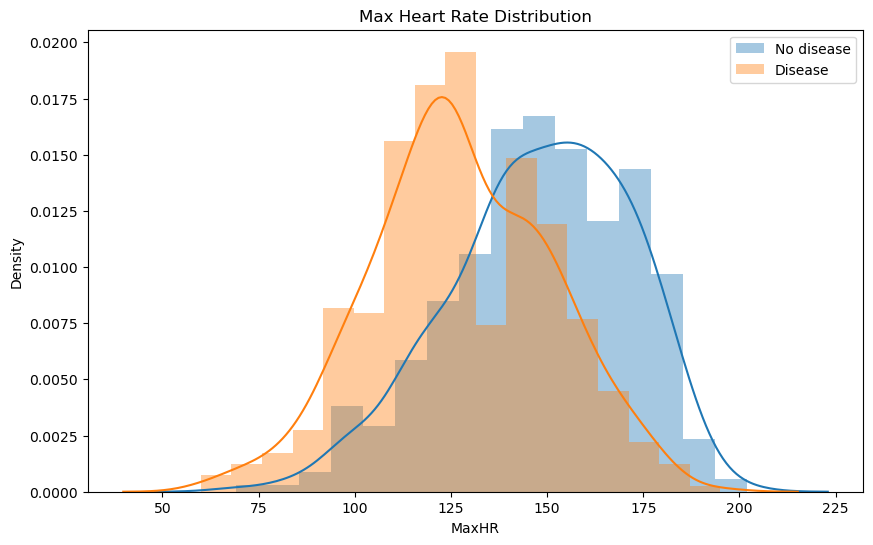

In [27]:
# 'MaxHR'
# Distribution of Maximum heart rate by disease status
fig,ax = plt.subplots(figsize=(10,6))
data_disease = data[data['HeartDisease']==1]
data_no_disease = data[data['HeartDisease']==0]

sns.distplot(data_no_disease['MaxHR'], label='No disease')
sns.distplot(data_disease['MaxHR'], label='Disease')
ax.legend()
ax.set_title('Max Heart Rate Distribution');

**Observation**   
* Here, having a low max heart rate exposes you to heart failure. Low max rate may mean that the heart is weakening. This makes sense to think about it.
* On the other, people with maximum heart rate (heart is fully functional) have a lower risk to heart failure.


More categorical and numeric features can be examined through the streamlit app attached to the project files. 

To run the app:

1. Open your command prompt or terminal: ```(base) domain@user:~$```
2. Install streamlit: ```pip install streamlit```
2. Make sure you are in the directory of this project: ```(base) domain@user:~$ cd project_path```
3. Type this code on your terminal and the app will launch on your default browser. ```(base) domain@user:~/Desktop$ streamlit run edaapp.py```

Enjoy the App!!!

## Searching for Patterns Using Scatter Plots
Here, we will perform multivariate analysis of our dataset for some features.

#### Age vs. Max Heart Rate for Heart Disease

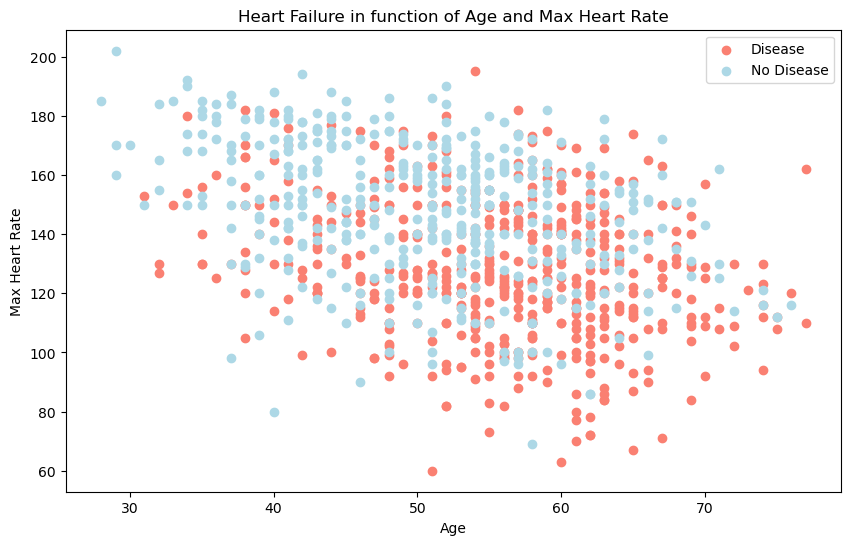

In [28]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
ax1 = plt.scatter(data.Age[data.HeartDisease==1],
            data.MaxHR[data.HeartDisease==1],
            c="salmon")

# Scatter with negative examples
ax2 = plt.scatter(data.Age[data.HeartDisease==0],
            data.MaxHR[data.HeartDisease==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Failure in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend([ax1, ax2], ["Disease", "No Disease"]);

**Observation**   
* Age and maximum heart rate have a roughly negative correlation.
* This makes sense as younger people have a healthier heart than older people.
* Looking at the clusters, it will be heart to classify heart disease just from the age and Max heart of the individual. 
* However, it can be infered that older people with low heart rate are more likely to have a heart failure. 

#### Age vs. Cholesterol for Heart Disease

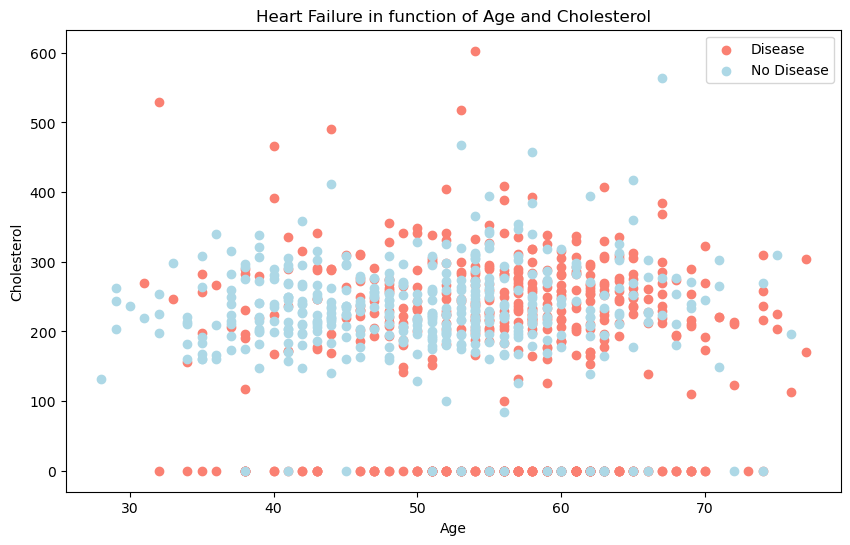

In [32]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
ax1 = plt.scatter(data.Age[data.HeartDisease==1],
            data.Cholesterol[data.HeartDisease==1],
            c="salmon")

# Scatter with negative examples
ax2 = plt.scatter(data.Age[data.HeartDisease==0],
            data.Cholesterol[data.HeartDisease==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Failure in function of Age and Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend([ax1, ax2], ["Disease", "No Disease"]);

**Observation**   
* This data tells us that Age and cholesterol levels are not correlated. This may be because cholesterol levels are dependent on the diet and sport activities, non of which as anything to do with age.
* We can also see that irregardless of the age, very high cholesterol levels leads to a high risk of heart failure.

#### Using PCA to visualise all features
With PCA, we can visualize the entire data in low dimensions while retaining the maximum information possible.

In [29]:
from sklearn.preprocessing import StandardScaler 
scaled = StandardScaler() 
scaled.fit(data) 
scaled_data = scaled.transform(data) 

In [30]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

In [31]:
# 
labels = data.HeartDisease

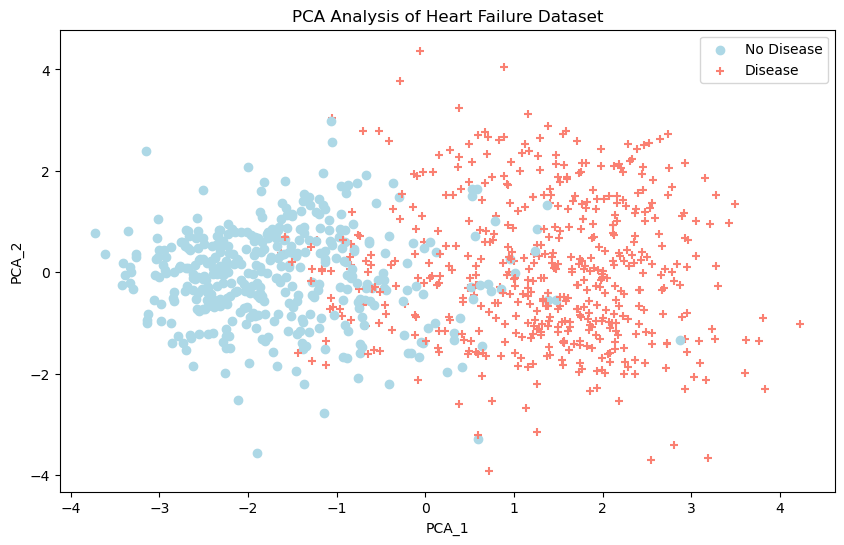

In [32]:
PC1 = 0 
PC2 = 1 
plt.figure(figsize=(10, 6))
for i in range(0, xpca.shape[0]): 
    if labels[i] == 0:
        c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='lightblue', marker='o')
    elif labels[i] == 1:
        c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='salmon', marker='+') 

# Add some helpful info
plt.title("PCA Analysis of Heart Failure Dataset")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.legend(["No Disease", "Disease"]);

**Observation**  
* Waouh, now we can see clear clusters. The normal and sick groups are almost clearly different.
* This is an indication that we can build a model to fit the data and predict patient diagnosis for heart disease from the given clinical data.

In [33]:
pca = PCA(n_components=3) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

In [34]:
xpca.shape

(918, 3)

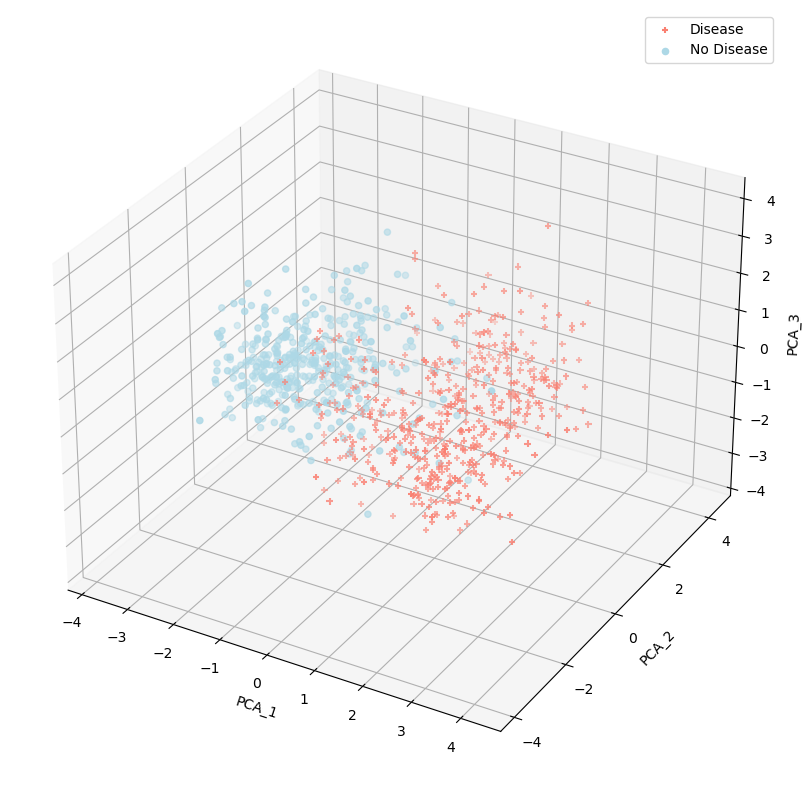

In [35]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

color = []
[color.append("lightblue")if level == 1 else color.append("salmon")for level in data["HeartDisease"]]

x_yes = []
y_yes = []
z_yes = []

x_no = []
y_no = []
z_no = []

for i in range(len(data)):
    # check target type
    if data.HeartDisease[i] == 1:
        x_yes.append(xpca[i,0])
        y_yes.append(xpca[i,1])
        z_yes.append(xpca[i,2])
    else:
        x_no.append(xpca[i,0])
        y_no.append(xpca[i,1])
        z_no.append(xpca[i,2]) 

# xs = xpca[:,0]
# ys = xpca[:,1]
# zs = xpca[:,2]

ax.scatter(x_yes, y_yes, z_yes, marker="+", c = "salmon", label = "Disease")
ax.scatter(x_no, y_no, z_no, marker="o", c = "lightblue", label = "No Disease")

ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
ax.legend();
plt.show()

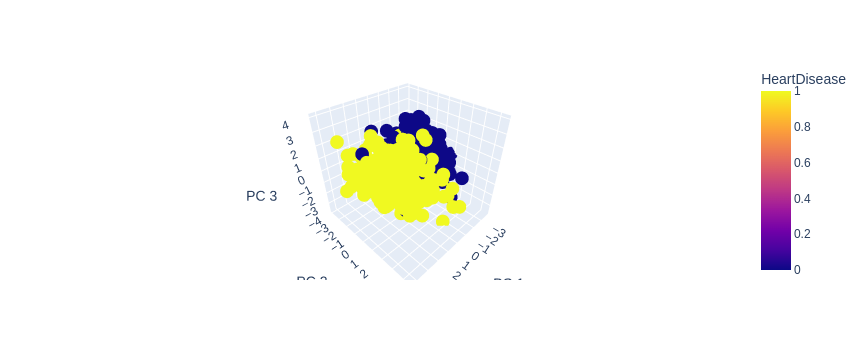

In [41]:
import plotly.express as px
pca_data = pd.concat([pd.DataFrame(xpca), data.HeartDisease], axis = 1)
fig = px.scatter_3d(pca_data, x=0, y=1, z=2, color = "HeartDisease",
                   labels={"0": 'PC 1', "1": 'PC 2', "2": 'PC 3'})
fig.show()

**Observation** 
* 3D PCA will surely show more informative clusters as the amount of information loss reduces with the number of principal components.

In [36]:
# Make a correlation matrix
data.corr()

Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750      -0.077150   0.254399    -0.095282   
Sex             0.055750  1.000000      -0.126559   0.005133    -0.200092   
ChestPainType  -0.077150 -0.126559       1.000000  -0.020647     0.067880   
RestingBP       0.254399  0.005133      -0.020647   1.000000     0.100893   
Cholesterol    -0.095282 -0.200092       0.067880   0.100893     1.000000   
FastingBS       0.198039  0.120076      -0.073151   0.070193    -0.260974   
RestingECG     -0.007484  0.071552      -0.072537   0.022656    -0.196544   
MaxHR          -0.382045 -0.189186       0.289123  -0.112135     0.235792   
ExerciseAngina  0.215793  0.190664      -0.354727   0.155101    -0.034166   
Oldpeak         0.258612  0.105734      -0.177377   0.164803     0.050148   
ST_Slope       -0.268264 -0.150693       0.213521  -0.075162     0.111471   
HeartDisease    0.282039  0.305445      -0.386828   0.107589    -0.232741   

                FastingBS  RestingECG     MaxHR  ExerciseAngina   Oldpeak  \
Age              0.198039   -0.007484 -0.382045        0.215793  0.258612   
Sex              0.120076    0.071552 -0.189186        0.190664  0.105734   
ChestPainType   -0.073151   -0.072537  0.289123       -0.354727 -0.177377   
RestingBP        0.070193    0.022656 -0.112135        0.155101  0.164803   
Cholesterol     -0.260974   -0.196544  0.235792       -0.034166  0.050148   
FastingBS        1.000000    0.087050 -0.131438        0.060451  0.052698   
RestingECG       0.087050    1.000000 -0.179276        0.077500 -0.020438   
MaxHR           -0.131438   -0.179276  1.000000       -0.370425 -0.160691   
ExerciseAngina   0.060451    0.077500 -0.370425        1.000000  0.408752   
Oldpeak          0.052698   -0.020438 -0.160691        0.408752  1.000000   
ST_Slope        -0.175774   -0.006778  0.343419       -0.428706 -0.501921   
HeartDisease     0.267291    0.057384 -0.400421        0.494282  0.403951   

                ST_Slope  HeartDisease  
Age            -0.268264      0.282039  
Sex            -0.150693      0.305445  
ChestPainType   0.213521     -0.386828  
RestingBP      -0.075162      0.107589  
Cholesterol     0.111471     -0.232741  
FastingBS      -0.175774      0.267291  
RestingECG     -0.006778      0.057384  
MaxHR           0.343419     -0.400421  
ExerciseAngina -0.428706      0.494282  
Oldpeak        -0.501921      0.403951  
ST_Slope        1.000000     -0.558771  
HeartDisease   -0.558771      1.000000

(12.5, -0.5)

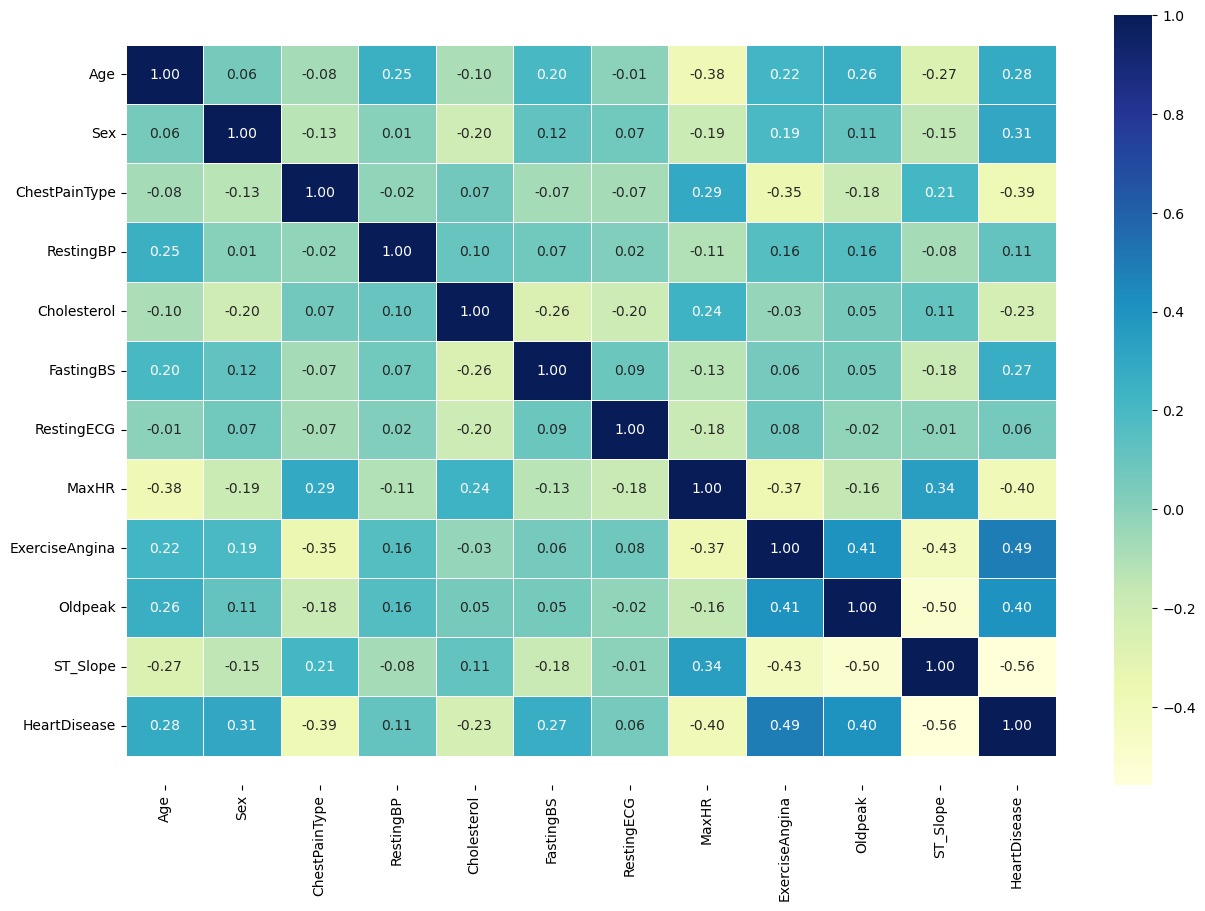

In [37]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**Observation**   
* All features except RestingECG have some level of relevant correlation with the target.
* We will keep all features for model as the ratio of the number of samples to the number of features (83.5) is already good. 

## 5. Modelling 
Here we will use sklearn and build machine learning models and train them to predict patient diagnosis of heart failure.

In [40]:
data.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

In [41]:
# Split data into X and y
X = data.drop("HeartDisease", axis=1).values

y = data["HeartDisease"].values

In [42]:
X

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [47]:
scaled = StandardScaler() 
scaled.fit(X) 
X = scaled.transform(X)
X[:3]

array([[-1.4331398 ,  0.51595242,  0.22903206,  0.41090889,  0.82507026,
        -0.55134134,  0.01725451,  1.38292822, -0.8235563 , -0.83243239,
         1.05211381],
       [-0.47848359, -1.93816322,  1.27505906,  1.49175234, -0.17196105,
        -0.55134134,  0.01725451,  0.75415714, -0.8235563 ,  0.10566353,
        -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, -0.12951283,  0.7701878 ,
        -0.55134134,  1.60121899, -1.52513802, -0.8235563 , -0.83243239,
         1.05211381]])

In [49]:
y[:20]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [48]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [50]:
y_test

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [51]:
X_train.shape, X_test.shape

((734, 11), (184, 11))

Now we've got our data split into training(80%) and test(20%) sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

The small dataset makes it easier to perform many experiments. So, we're going to try 6 different machine learning models. 
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. SVM Classifier
5. Naive Bayes, Gaussian 
6. Gradient Boosting

In [52]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(random_state = 42),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(random_state = 42),
          "SVC": SVC(random_state = 42),
          "NB Classifier": GaussianNB(),
          "Gradient Boost": GradientBoostingClassifier(random_state = 42)
         }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [54]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8478260869565217,
 'KNN': 0.8478260869565217,
 'Random Forest': 0.8804347826086957,
 'SVC': 0.8641304347826086,
 'NB Classifier': 0.842391304347826,
 'Gradient Boost': 0.875}

### Model Comparison

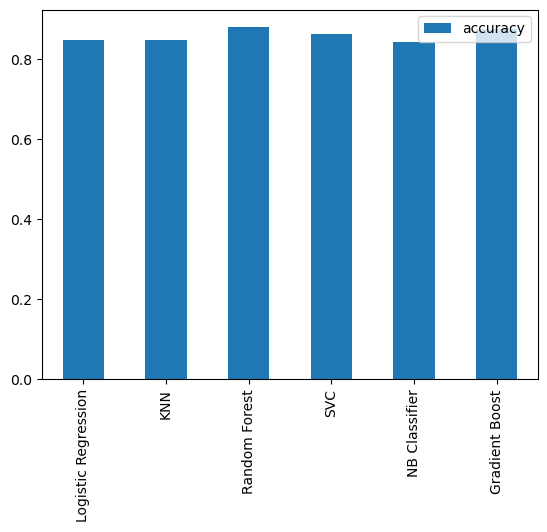

In [55]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

We've got good results so far, but not way near our aim (95%). Random Forest and Gradient Boosting Classifiers far out performs the other classifiers? SVC also does well. Therefore, we will coninue with  SVC and the 2 ensemble models.

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* SVC()
* RandomForestClassifier()
* GradientBoostingClassifer()

... using RandomizedSearchCV

In [56]:
# Create a hyperparameter grid for SVC
svc_grid = {"C": np.logspace(-4, 4, 10),
                "kernel": ["rbf"],
                "degree": [2,3,4],
                "gamma": ["scale", "auto"],
                "random_state": [42]
           }

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(50, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 10, 1),
           "min_samples_leaf": np.arange(1, 5, 1),
          "random_state": [42]}

# Create a hyperparameter grid for GradientBoostingClassifier
gb_grid = {"n_estimators": np.arange(50, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 10, 1),
           "min_samples_leaf": np.arange(1, 5, 1),
           "loss" : ["exponential", "deviance"],
           "random_state": [42]
          }

In [57]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [175]:
# Tune SVC

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_svc = RandomizedSearchCV(SVC(),
                                param_distributions=svc_grid,
                                cv=cv,
                                n_iter=50,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_svc.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=SVC(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf'],
                                        'random_state': [42]},
                   verbose=True)

In [176]:
ml_scores = {}

In [177]:
rs_svc.best_params_

{'random_state': 42,
 'kernel': 'rbf',
 'gamma': 'auto',
 'degree': 3,
 'C': 2.782559402207126}

In [178]:
rs_svc.score(X_test, y_test)

0.8913043478260869

In [179]:
# save score
ml_scores["SVC"] = rs_svc.score(X_test, y_test)

Now we've tuned SVC(), let's do the same for RandomForestClassifier()...

In [180]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=cv,
                           n_iter=50,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950]),
                                        'random_state': [42]},
                   verbose=True)

In [283]:
# Find the best hyperparameters
rs_rf.best_params_

{'random_state': 42,
 'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': None}

In [282]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8913043478260869

In [183]:
# save score
ml_scores["RandomForestClassifier"] = rs_rf.score(X_test, y_test)

Now we will tune GradientBoostingClassifier...

In [201]:
# Setup random seed
# Setup random hyperparameter search for GradientBoostingClassifier
rs_gb = RandomizedSearchCV(GradientBoostingClassifier(), 
                           param_distributions=gb_grid,
                           cv=cv,
                           n_iter=50,
                           verbose=True)

# Fit random hyperparameter search model for GradientBoostingClassifier()
rs_gb.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(), n_iter=50,
                   param_distributions={'loss': ['exponential', 'deviance'],
                                        'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950]),
                                        'random_state': [42]},
                   verbose=True)

In [205]:
# Find the best hyperparameters
rs_gb.best_params_

{'random_state': 42,
 'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 3,
 'loss': 'exponential'}

In [206]:
# Evaluate the randomized search GradientBoostingClassifier model
rs_gb.score(X_test, y_test)

0.8858695652173914

In [210]:
# save score
ml_scores["GradientBoostingClassifier"] = rs_gb.score(X_test, y_test)

In [211]:
ml_scores

{'SVC': 0.8913043478260869,
 'RandomForestClassifier': 0.8913043478260869,
 'GradientBoostingClassifier': 0.8858695652173914}

In [212]:
ml_scores["SVC"] == ml_scores['RandomForestClassifier']

True

## Hyperparamter Tuning with GridSearchCV

Since SVC and Randomforest have exactly the same results.We will continue with RandomForestClassifier since it provides us with the means to learn the feature importances. We'll try and improve them again using GridSearchCV...

In [57]:
# Different hyperparameters for our RandomForestClassifier model
gs_rf_grid = {"n_estimators": [140,145,150,155,160],
               "max_depth": [None],
               "min_samples_split": [4,5,6],
               "min_samples_leaf": [1,2,3],
               "random_state": [42]}
# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                      param_grid=gs_rf_grid,
                      cv=cv,
                      verbose=True)

# Fit grid hyperparameter search model
gs_rf.fit(X_train, y_train);

Fitting 10 folds for each of 45 candidates, totalling 450 fits


In [59]:
# Check the best hyperparmaters
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 160,
 'random_state': 42}

In [60]:
# Evaluate the grid search RandomForestClassifier model
gs_rf.score(X_test, y_test)

0.8804347826086957

These results are worse than randomized search (weird). We will just consider the previous parameters.

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [67]:
clf = RandomForestClassifier(random_state = 42,
                             n_estimators = 150,
                             min_samples_split = 5,
                             min_samples_leaf = 2,
                             max_depth = None)

clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [68]:
# Make predictions with tuned model
y_preds = clf.predict(X_test)

In [69]:
y_preds

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [70]:
y_test

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

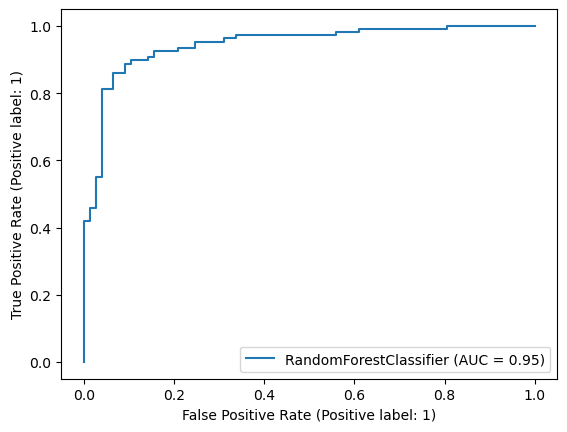

In [71]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(clf, X_test, y_test)

In [72]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[68  9]
 [11 96]]


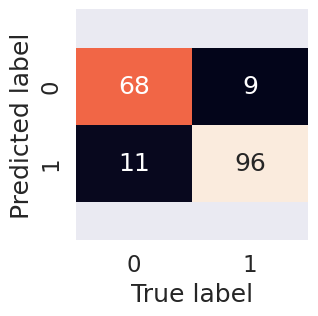

In [73]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [74]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [75]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(random_state = 42,
                             n_estimators = 150,
                             min_samples_split = 5,
                             min_samples_leaf = 2,
                             max_depth = None)

In [76]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=cv,
                         scoring="accuracy")
cv_acc

array([0.93478261, 0.86956522, 0.82608696, 0.86956522, 0.79347826,
       0.92391304, 0.92391304, 0.88043478, 0.82417582, 0.9010989 ])

In [77]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8747013855709508

In [78]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=cv,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8691199112323964

In [79]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=cv,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9134901960784314

In [80]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=cv,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8897675054933643

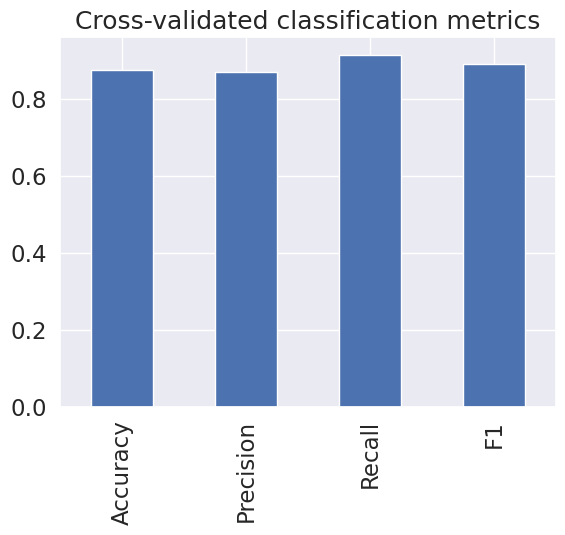

In [81]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our Random Forest model...

In [82]:
data.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

In [84]:
# fit model
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [85]:
# Match coef's of features to columns
feature_dict = dict(zip(data.columns, list(clf.feature_importances_)))
feature_dict

{'Age': 0.07198703315730481,
 'Sex': 0.03624244430626898,
 'ChestPainType': 0.10554745359812422,
 'RestingBP': 0.05219706331633896,
 'Cholesterol': 0.09473839713326812,
 'FastingBS': 0.018636567315591976,
 'RestingECG': 0.019220736753188333,
 'MaxHR': 0.08962691246203229,
 'ExerciseAngina': 0.12188157386270213,
 'Oldpeak': 0.11790524749278451,
 'ST_Slope': 0.2720165706023956}

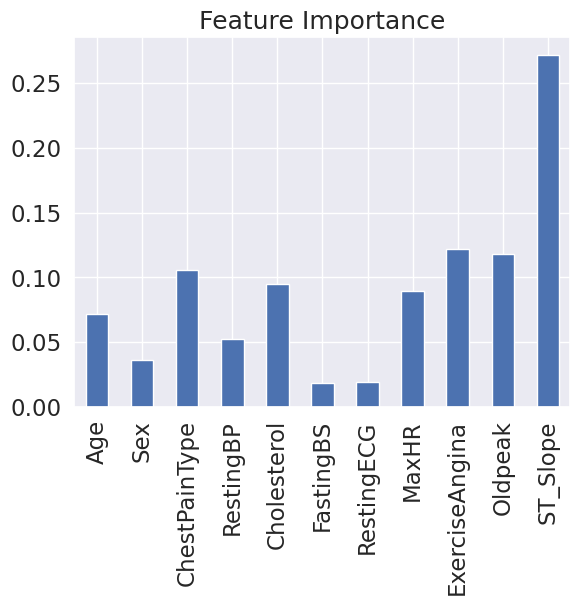

In [86]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [87]:
feature_df = feature_df.T.abs()
feature_df = feature_df.sort_values(0, ascending = False)

<AxesSubplot:xlabel='0'>

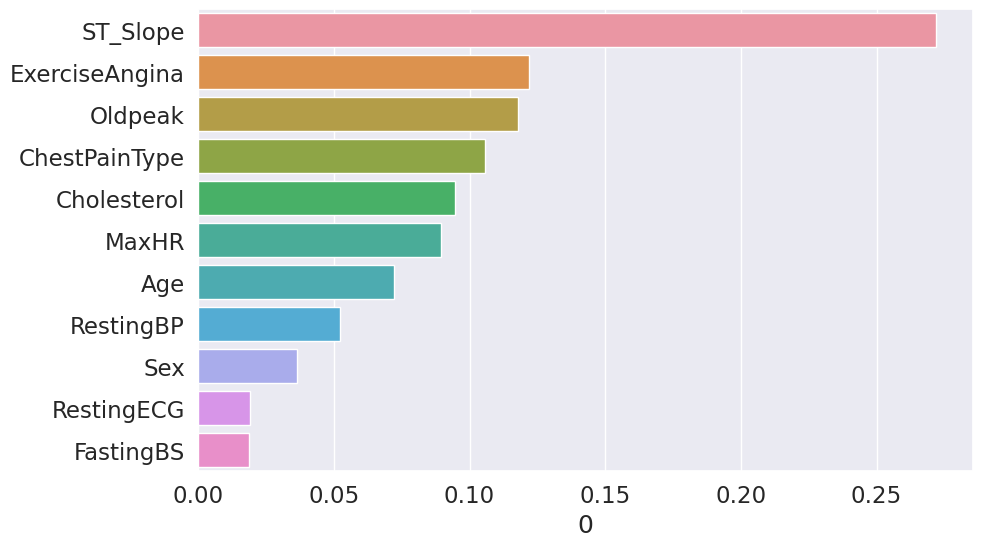

In [88]:
importance = feature_df[0]
feature = feature_df.index
fig,ax = plt.subplots(figsize=(10,6))
# feature_df.sort_values('importance', ascending=False, inplace=True)
sns.barplot(x=importance, y=feature)

**Observation**  
* ST_Slope is considered the most important feature for prediction.   
slope - the slope of the peak exercise ST segment
* * 0: Upsloping: better heart rate with excercise (uncommon)
* * 1: Flatsloping: minimal change (typical healthy heart)
* * 2: Downslopins: signs of unhealthy heart
* Sex was surprising not given much importance even though heart failure is more common in men. 

In [56]:
pd.crosstab(data["ST_Slope"], data["HeartDisease"])

HeartDisease    0    1
ST_Slope              
0              14   49
1              79  381
2             317   78

## 6. Experimentation

The model is not good enough, so we will try CatBoost and XGBoost to boost performance. 

In [57]:
# import models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [92]:
# Put models in a dictionary
models = {"XGBClassifier": XGBClassifier(random_state = 42),
          "CatBoostClassifier": CatBoostClassifier(random_state = 42, verbose = False),
         }

In [93]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'XGBClassifier': 0.8532608695652174, 'CatBoostClassifier': 0.8858695652173914}

## RandomizedSearch

In [94]:
# Different hyperparameters for our CatBoostClassifier model
rs_cb_grid = {"n_estimators": np.arange(50,1500,5),
               "max_depth": np.arange(5,20,2),
               "min_data_in_leaf": np.arange(1,10,1),
              "max_leaves" : np.arange(1,50,5),
              "random_state" : [42]
             }

rs_cb = RandomizedSearchCV(CatBoostClassifier(verbose = False, grow_policy = "Lossguide"), 
                           param_distributions=rs_cb_grid,
                           cv=cv,
                           n_iter=50,
                           verbose=True)

# Fit random hyperparameter search model for GradientBoostingClassifier()
rs_cb.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f35a0f8d190>,
                   n_iter=50,
                   param_distributions={'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                                        'max_leaves': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]),
                                        'min_data_in_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([  50,   55,   60,   65,...
       1150, 1155, 1160, 1165, 1170, 1175, 1180, 1185, 1190, 1195, 1200,
       1205, 1210, 1215, 1220, 1225, 1230, 1235, 1240, 1245, 1250, 1255,
       1260, 1265, 1270, 1275, 1280, 1285, 1290, 1295, 1300, 1305, 1310,
       1315, 1320, 1325, 1330, 1335, 1340, 1345, 1350, 1355, 1360, 1365,
       1370, 1375, 1380, 1385, 1390, 1395, 1400, 1405, 1410, 1415, 1420,
       1425, 1430, 1435, 1440, 1445, 1450, 1455, 

In [97]:
# Evaluate the randomized search CatBoostClassifier model
rs_cb.score(X_test, y_test)

0.8804347826086957

In [98]:
rs_cb.best_params_

{'random_state': 42,
 'n_estimators': 70,
 'min_data_in_leaf': 8,
 'max_leaves': 36,
 'max_depth': 19}

All attempts to obtain better models failed. We will try to engineer new features for random forest

### Trying Neural Networks

In [58]:
# Import 
from sklearn.neural_network import MLPClassifier

In [59]:
clf = MLPClassifier(random_state=42).fit(X_train, y_train)

In [60]:
clf.score(X_test, y_test)

0.8967391304347826

Waouh!!! Better than all others. Let's try tuning neural network.

In [82]:
nn_grid = {"hidden_layer_sizes":[(100,), (200,), (50,50,50)],
           'activation': ["tanh",'relu'],
           'solver': ['adam'],
           'learning_rate': ['constant']
          }

In [83]:
# Setup random hyperparameter search for RandomForestClassifier
rs_nn = RandomizedSearchCV(MLPClassifier(random_state = 42), 
                           param_distributions=nn_grid,
                           cv=cv,
                           n_iter=10,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_nn.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=MLPClassifier(),
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,), (200,),
                                                               (50, 50, 50)],
                                        'learning_rate': ['constant'],
                                        'solver': ['adam']},
                   verbose=True)

In [86]:
# Find the best hyperparameters
rs_nn.best_params_

{'solver': 'adam',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (100,),
 'activation': 'relu'}

In [87]:
# Evaluate the randomized search neural network model
rs_nn.score(X_test, y_test)

0.907608695652174

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [89]:
clf = MLPClassifier(solver = "adam",
                    learning_rate = "constant",
                    hidden_layer_sizes = (100,),
                    activation = "relu",
                    random_state = 42
                   )

clf.fit(X_train, y_train)

MLPClassifier()

In [90]:
# Make predictions with tuned model
y_preds = clf.predict(X_test)

In [91]:
y_preds

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

In [92]:
y_test

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

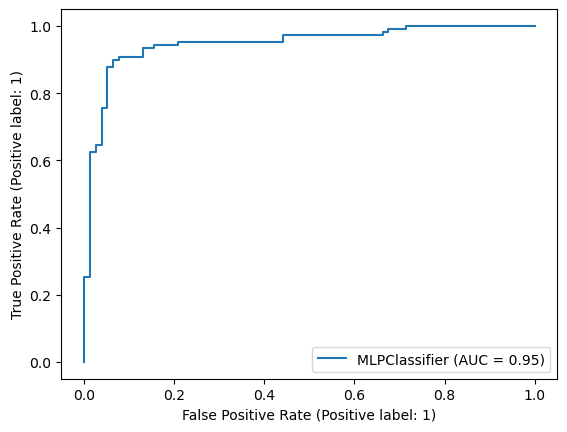

In [93]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(clf, X_test, y_test)

In [94]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[73  4]
 [13 94]]


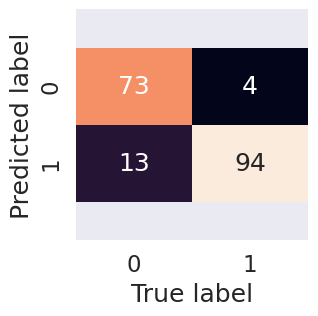

In [95]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [96]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        77
           1       0.96      0.88      0.92       107

    accuracy                           0.91       184
   macro avg       0.90      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [97]:
# Create a new classifier with best parameters
clf = MLPClassifier(solver = "adam",
                    learning_rate = "constant",
                    hidden_layer_sizes = (100,),
                    activation = "relu")

In [98]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=cv,
                         scoring="accuracy")
cv_acc

array([0.89130435, 0.86956522, 0.80434783, 0.86956522, 0.80434783,
       0.89130435, 0.90217391, 0.90217391, 0.84615385, 0.83516484])

In [99]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8616101290014333

In [100]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=cv,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8640978328090128

In [101]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=cv,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8858039215686274

In [102]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=cv,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8756181543834863

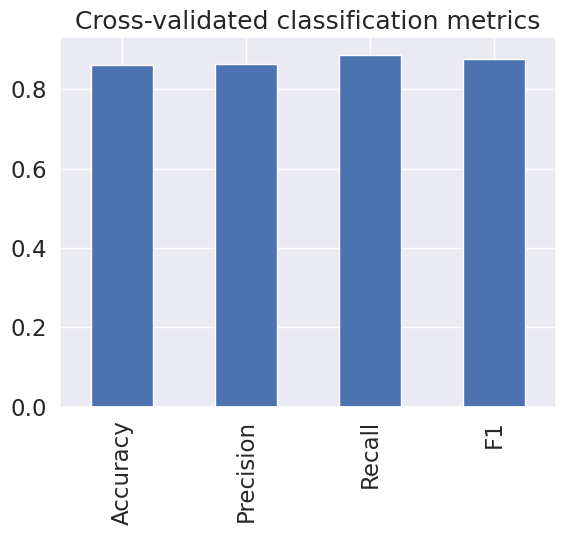

In [103]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Results Visualization

In [108]:
# Fit an instance of RandomForestClassifier
clf = MLPClassifier(solver = "adam",
                    learning_rate = "constant",
                    hidden_layer_sizes = (100,),
                    activation = "relu",
                    random_state=42
                   )

clf.fit(X_train, y_train);

In [109]:
preds = clf.predict(X)

In [110]:
Tags = {"Tags":[]}

for i in range(len(data)):
    if data["HeartDisease"][i] == 1 and preds[i] == 1:
        Tags["Tags"].append("TP")
    elif data["HeartDisease"][i] == 1 and preds[i] == 0:
        Tags["Tags"].append("FN")
    elif data["HeartDisease"][i] == 0 and preds[i] == 0:
        Tags["Tags"].append("TN")
    elif data["HeartDisease"][i] == 0 and preds[i] == 1:
        Tags["Tags"].append("FP")

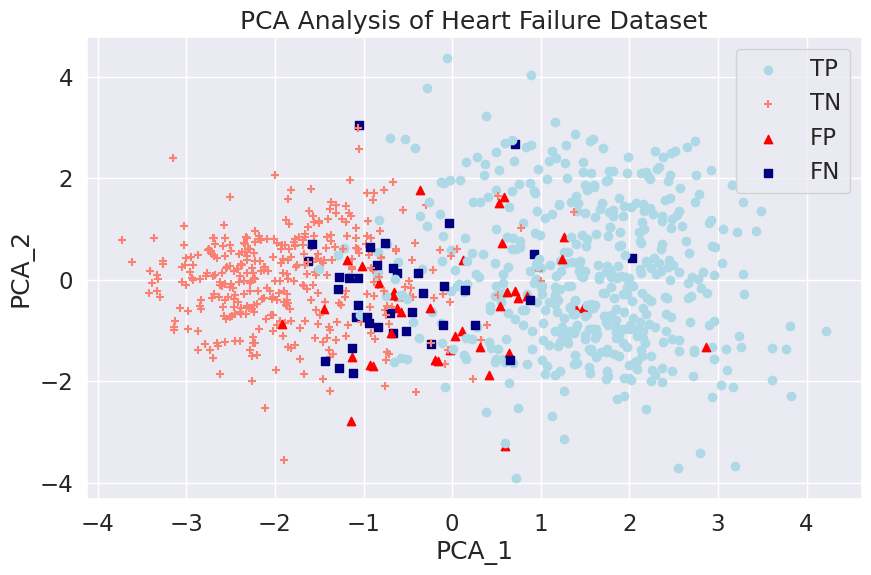

In [111]:
pca = PCA(n_components=2) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)
# 
labels = data.HeartDisease
#PC1 = 0 
PC2 = 1 
plt.figure(figsize=(10, 6))
for i in range(0, xpca.shape[0]): 
    if Tags["Tags"][i] == "TP":
        c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='lightblue', marker="o")
    elif Tags["Tags"][i] == "TN":
        c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='salmon', marker="+")
    elif Tags["Tags"][i] == "FP":
        c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='red', marker="^")
    elif Tags["Tags"][i] == "FN":
        c4 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='navy', marker="s")        
# Add some helpful info
plt.title("PCA Analysis of Heart Failure Dataset")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.legend([c1,c2,c3,c4],["TP", "TN","FP","FN"]);

**Observation**   
* After training the neural network 80% of the data. The false positives and false negative predictions on the entirely dataset are visualized.
* We can hardly conclude that the model did not learn well due to the presence of outliers but in essence, the false positives and false negatives were all in the overlapping region.
* It is safe to assume that the examples within the overlapping region are so hard to learn. 
* It may be helpful to further examine those falsely predicted samples.